In [7]:
import re
import csv
import pandas as pd

In [8]:
### CONSTANTS ###
DATA_LINE = 15
ORIGINAL_FILENAME = "wine_quality.csv"
FILENAME = "wine_quality_cleaned.csv"

In [31]:
### CLEAN CSV FILE - ONLY RUN ONCE TO GET CLEANED CSV ###
file = open('{}'.format(ORIGINAL_FILENAME), "r")

fieldnames = []
for i in range(0, DATA_LINE-1):
    line = file.readline()
    m = re.search('(?<=@attribute )(.+)(?= \w+)', line)
    if (m):
        fieldnames.append(m.group(0))

with open('{}'.format(FILENAME), "w", newline="") as clean_csv:
    clean_csv.write(','.join(fieldnames) + "\n")
    for line in file:
        clean_csv.write(file.readline())

file.close()

In [9]:
# data = pd.read_csv('{}'.format(FILENAME),sep="delimiter",header=None,engine='python')
data = pd.read_csv("wine_quality_cleaned.csv")
data

,fixedacid,volacid,citricacid,residualsugar,chlorides,freesulfur,totalsulfur,density,pH,sulphates,alcohol,quality
0,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
1,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
2,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6
3,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.700000,5
4,6.6,0.160,0.40,1.50,0.044,48.0,143.0,0.99120,3.54,0.52,12.400000,7
5,6.8,0.260,0.42,1.70,0.049,41.0,122.0,0.99300,3.47,0.48,10.500000,8
6,6.6,0.270,0.41,1.30,0.052,16.0,142.0,0.99510,3.42,0.47,10.000000,6
7,7.0,0.280,0.39,8.70,0.051,32.0,141.0,0.99610,3.38,0.53,10.500000,6
8,7.4,0.250,0.36,2.05,0.050,31.0,100.0,0.99200,3.19,0.44,10.800000,6
9,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.600000,5


In [25]:
z=data.quality.unique()
print("Class:\n",z)
X = data.iloc[:, :-1].values
print(X)
y = data.iloc[:, 11].values
print(y)

Class:
 [ 6  5  7  8  4  3  9  0 11]
[[ 7.2   0.23  0.32 ...  3.19  0.4   9.9 ]
 [ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 8.1   0.22  0.43 ...  3.22  0.45 11.  ]
 ...
 [ 6.8   0.22  0.36 ...  3.04  0.54  9.2 ]
 [ 6.1   0.34  0.29 ...  3.06  0.44 11.8 ]
 [ 6.5   0.23  0.38 ...  3.29  0.54  9.7 ]]
[6 6 6 ... 5 6 5]


In [11]:
#Building and training the kNN model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
#Testing kNN Model
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('always')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn import metrics
print("Training accuracy: ",metrics.accuracy_score(y_test, y_pred))

[[  0   0   2   1   0   0   0   0]
 [  0   4   6   4   1   0   0   0]
 [  0   2  65  86  15   2   0   0]
 [  0   2  59 120  25   4   0   0]
 [  0   1  17  35  19   1   0   0]
 [  0   0   5   9   3   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.44      0.27      0.33        15
           5       0.42      0.38      0.40       170
           6       0.47      0.57      0.51       210
           7       0.30      0.26      0.28        73
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1

    accuracy                           0.42       490
   macro avg       0.20      0.19      0.19       490
weighted avg       0.41      0.42      0.41       490

Training accuracy:  0.42448979591836733


C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#  Part 4 – Cross validation
from sklearn.model_selection import KFold
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=100)
classifier = KNeighborsClassifier(n_neighbors=4)
x1 = data.iloc[:, :-1].values
y1 = data.iloc[:, 11].values
results_kfold = model_selection.cross_val_score(classifier, x1, y1, cv=kfold,scoring='accuracy')

In [32]:
print(results_kfold)
print(results_kfold.mean())

[0.38367347 0.44081633 0.49795918 0.3755102  0.35102041 0.42040816
 0.37959184 0.47346939 0.46122449 0.45714286]
0.4240816326530612


In [34]:
#Part 5 - Optimizing  n-neighbor parameter 
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 15))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(classifier, param_grid, cv=10, scoring='accuracy')
grid.fit(x1, y1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}


C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\bhoin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [35]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00318842, 0.00321476, 0.00398357, 0.0031846 , 0.00243556,
        0.00646975, 0.00426681, 0.00416377, 0.00386519, 0.0039331 ,
        0.00306644, 0.00455058, 0.00385077, 0.00263941]),
 'std_fit_time': array([0.00101747, 0.00045705, 0.00051278, 0.00092857, 0.0006398 ,
        0.00612131, 0.0012933 , 0.00125   , 0.00061369, 0.00047933,
        0.00137367, 0.00081951, 0.00144579, 0.00167863]),
 'mean_score_time': array([0.01819198, 0.01909075, 0.02117524, 0.01730154, 0.01940684,
        0.02925842, 0.02385502, 0.02923055, 0.02196505, 0.03108683,
        0.01643548, 0.03193364, 0.02475336, 0.01996775]),
 'std_score_time': array([0.00582285, 0.00849625, 0.00514233, 0.00389197, 0.01069327,
        0.00583166, 0.00786003, 0.00825701, 0.00385013, 0.00552091,
        0.00691687, 0.00382568, 0.00918101, 0.00886227]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              mask=[False, False, False, False, False, False, Fal

In [40]:
# create a list of the mean scores only
# list comprehension to loop through grid.cv_results_
grid_mean_scores = grid.cv_results_["mean_test_score"]
print(grid_mean_scores)

[0.44244898 0.41959184 0.41632653 0.42612245 0.42734694 0.42122449
 0.42244898 0.41795918 0.42408163 0.42408163 0.42816327 0.42204082
 0.42204082 0.42612245]


Text(0, 0.5, 'Cross-Validated Accuracy')

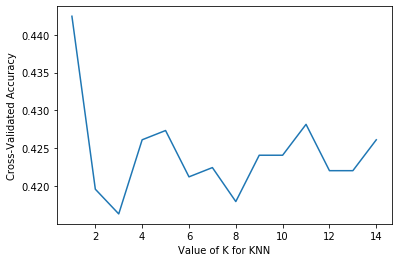

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [42]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.4424489795918367
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
